#IT0425 - Introducción a la Inteligencia Artificial

### Otoño 2023

### IT0425_Lab_2.5

**Profesor Enrique Naredo García**

<font size = 2>
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Se recuerda no compartir esta información fuera de los integrantes registrados en este curso. La reproducción total o parcial de este documento requiere autorización por escrito del titular del copyright.*
</font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Define the heads, relations, and tails
head = ['drugA', 'drugB', 'drugC', 'drugD', 'drugA', 'drugC',
        'drugD', 'drugE', 'gene1', 'gene2','gene3', 'gene4',
        'gene50', 'gene2', 'gene3', 'gene4']
relation = ['treats', 'treats', 'treats', 'treats', 'inhibits',
            'inhibits', 'inhibits', 'inhibits', 'associated',
            'associated', 'associated',
            'associated', 'associated', 'interacts', 'interacts',
            'interacts']
tail = ['fever', 'hepatitis', 'bleeding', 'pain', 'gene1', 'gene2',
        'gene4', 'gene20', 'obesity', 'heart_attack', 'hepatitis',
        'bleeding', 'cancer', 'gene1', 'gene20', 'gene50']

# Create a dataframe
df = pd.DataFrame({'head': head, 'relation': relation, 'tail': tail})
df

,head,relation,tail
0,drugA,treats,fever
1,drugB,treats,hepatitis
2,drugC,treats,bleeding
3,drugD,treats,pain
4,drugA,inhibits,gene1
5,drugC,inhibits,gene2
6,drugD,inhibits,gene4
7,drugE,inhibits,gene20
8,gene1,associated,obesity
9,gene2,associated,heart_attack


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   head      16 non-null     object
 1   relation  16 non-null     object
 2   tail      16 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [ ]:
df.describe()

,head,relation,tail
count,16,16,16
unique,10,4,12
top,drugA,associated,hepatitis
freq,2,5,2


In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# create el knowledge graph
G = nx.Graph()
for _, row in df.iterrows():
  G.add_edge(row['head'], row['tail'], label=row['relation'])

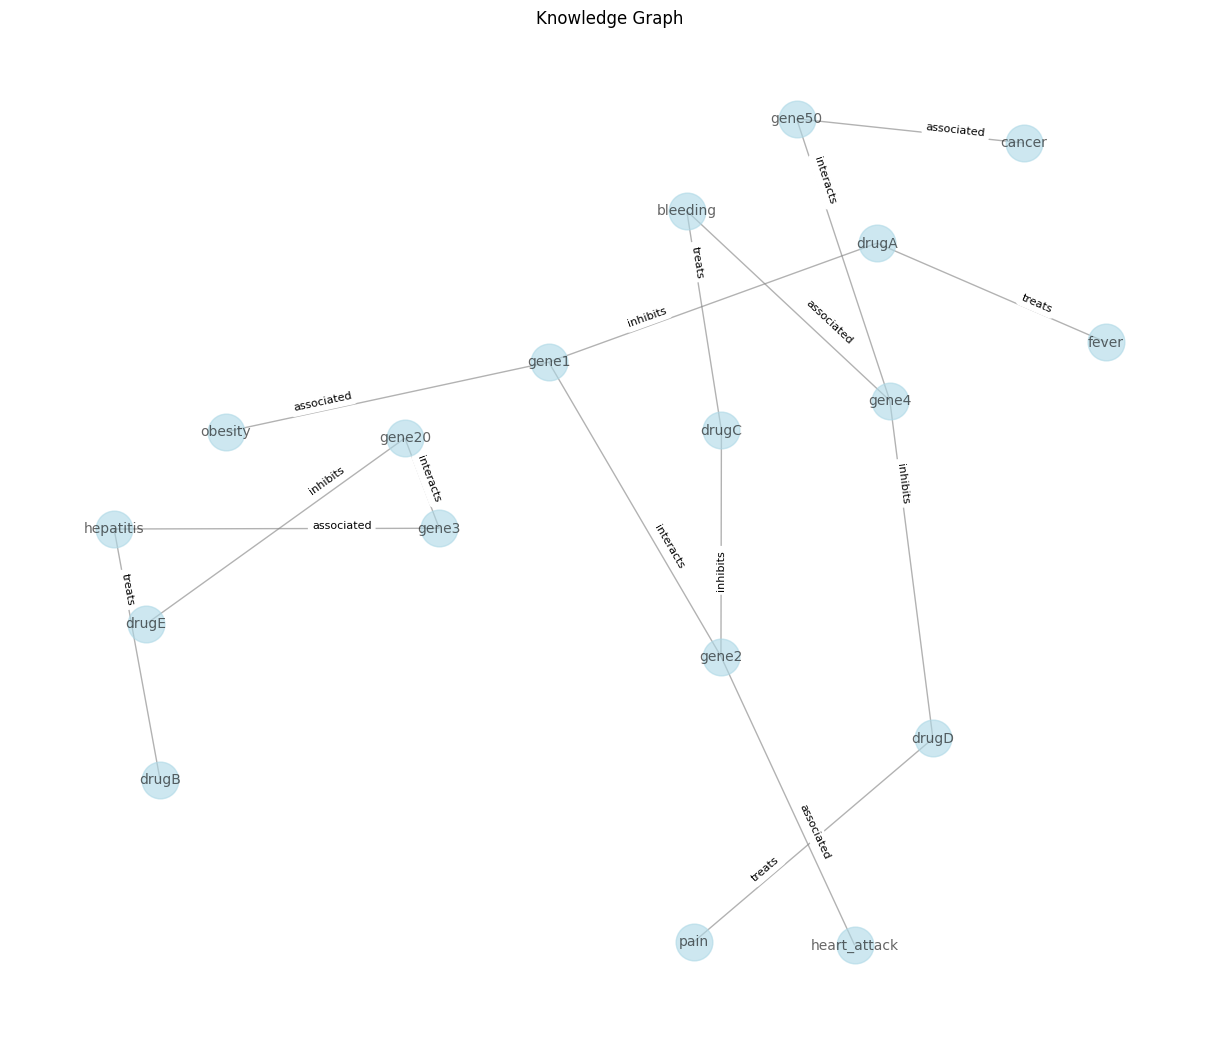

In [ ]:
# visualiza el knowledge graph
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700,
        node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,
     font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

Number of nodes: 18
Number of edges: 16
Ratio edges to nodes: 0.89


In [ ]:
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
  print(f'{node}: Degree Centrality = {centrality:.2f}')

drugA: Degree Centrality = 0.12
fever: Degree Centrality = 0.06
drugB: Degree Centrality = 0.06
hepatitis: Degree Centrality = 0.12
drugC: Degree Centrality = 0.12
bleeding: Degree Centrality = 0.12
drugD: Degree Centrality = 0.12
pain: Degree Centrality = 0.06
gene1: Degree Centrality = 0.18
gene2: Degree Centrality = 0.18
gene4: Degree Centrality = 0.18
drugE: Degree Centrality = 0.06
gene20: Degree Centrality = 0.12
obesity: Degree Centrality = 0.06
heart_attack: Degree Centrality = 0.06
gene3: Degree Centrality = 0.12
gene50: Degree Centrality = 0.12
cancer: Degree Centrality = 0.06


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
for node, centrality in betweenness_centrality.items():
  print(f'Betweenness Centrality of {node}: {centrality:.2f}')

Betweenness Centrality of drugA: 0.08
Betweenness Centrality of fever: 0.00
Betweenness Centrality of drugB: 0.00
Betweenness Centrality of hepatitis: 0.02
Betweenness Centrality of drugC: 0.26
Betweenness Centrality of bleeding: 0.26
Betweenness Centrality of drugD: 0.08
Betweenness Centrality of pain: 0.00
Betweenness Centrality of gene1: 0.21
Betweenness Centrality of gene2: 0.29
Betweenness Centrality of gene4: 0.26
Betweenness Centrality of drugE: 0.00
Betweenness Centrality of gene20: 0.02
Betweenness Centrality of obesity: 0.00
Betweenness Centrality of heart_attack: 0.00
Betweenness Centrality of gene3: 0.03
Betweenness Centrality of gene50: 0.08
Betweenness Centrality of cancer: 0.00


In [ ]:
closeness_centrality = nx.closeness_centrality(G)
for node, centrality in closeness_centrality.items():
  print(f'Closeness Centrality of {node}: {centrality:.2f}')

Closeness Centrality of drugA: 0.18
Closeness Centrality of fever: 0.15
Closeness Centrality of drugB: 0.09
Closeness Centrality of hepatitis: 0.13
Closeness Centrality of drugC: 0.26
Closeness Centrality of bleeding: 0.26
Closeness Centrality of drugD: 0.19
Closeness Centrality of pain: 0.15
Closeness Centrality of gene1: 0.22
Closeness Centrality of gene2: 0.26
Closeness Centrality of gene4: 0.24
Closeness Centrality of drugE: 0.09
Closeness Centrality of gene20: 0.13
Closeness Centrality of obesity: 0.17
Closeness Centrality of heart_attack: 0.19
Closeness Centrality of gene3: 0.16
Closeness Centrality of gene50: 0.19
Closeness Centrality of cancer: 0.15


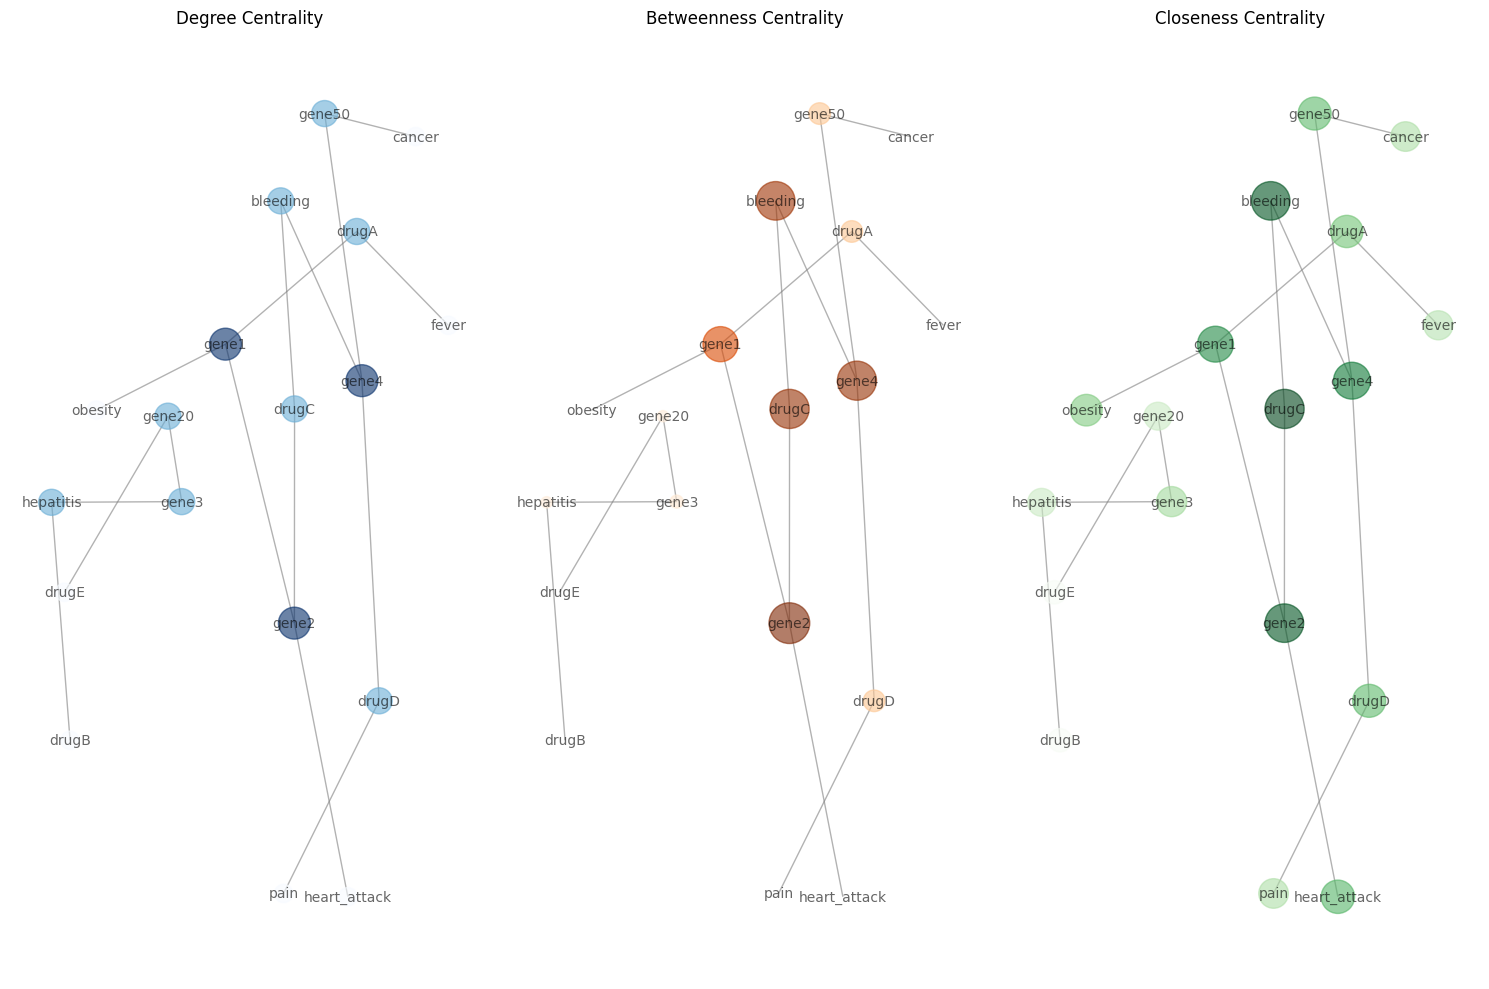

In [ ]:
# calcula la medida de centralidad (centrality)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# visualiza la medida de centralidad (centrality)
plt.figure(figsize=(15, 10))

# grado de centralidad
plt.subplot(131)
nx.draw(G, pos, with_labels=True, font_size=10,
        node_size=[v * 3000 for v in degree_centrality.values()]
        , node_color=list(degree_centrality.values()),
        cmap=plt.cm.Blues, edge_color='gray', alpha=0.6)
plt.title('Degree Centrality')

# centralidad de intermediación
plt.subplot(132)
nx.draw(G, pos, with_labels=True, font_size=10,
        node_size=[v * 3000 for v in betweenness_centrality.values()],
        node_color=list(betweenness_centrality.values()),
        cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6)
plt.title('Betweenness Centrality')

# centralidad de cercanía
plt.subplot(133)
nx.draw(G, pos, with_labels=True, font_size=10,
        node_size=[v * 3000 for v in closeness_centrality.values()],
        node_color=list(closeness_centrality.values()),
        cmap=plt.cm.Greens, edge_color='gray', alpha=0.6)
plt.title('Closeness Centrality')

plt.tight_layout()
plt.show()

In [ ]:
source_node = 'gene2'
target_node = 'cancer'

In [ ]:
# Find the shortest path
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)


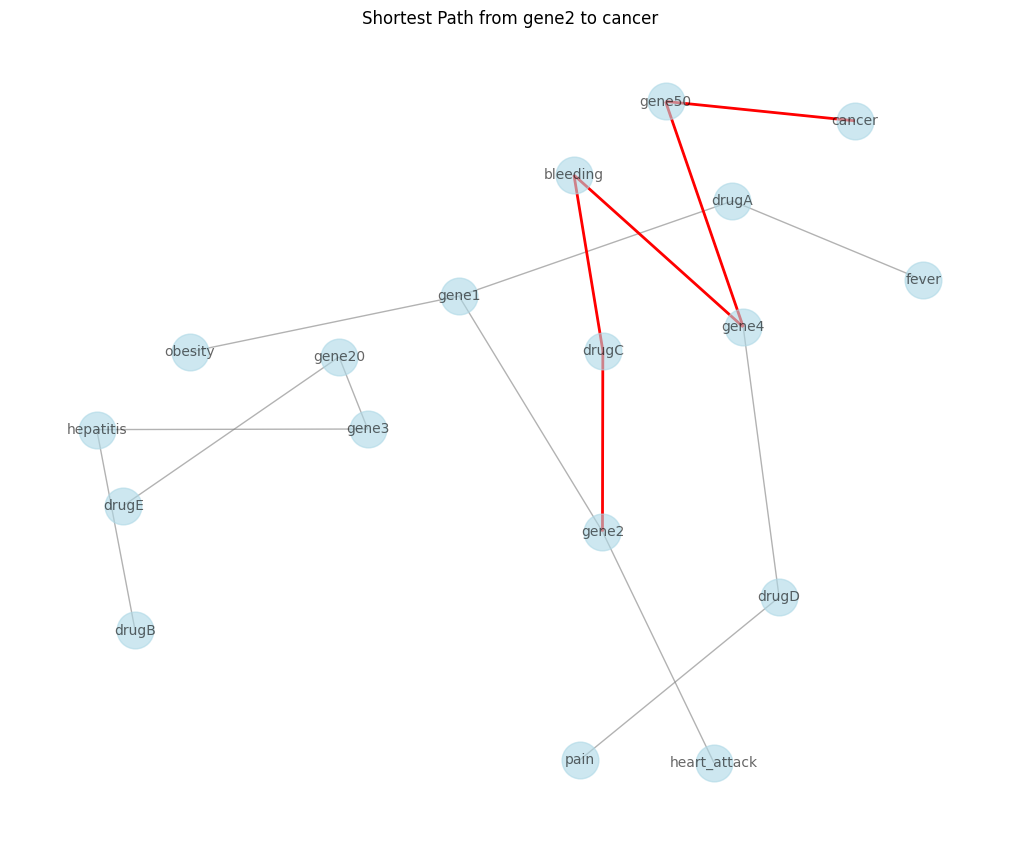

Shortest Path: ['gene2', 'drugC', 'bleeding', 'gene4', 'gene50', 'cancer']


In [ ]:
# Visualize the shortest path
plt.figure(figsize=(10, 8))
path_edges = [(shortest_path[i], shortest_path[i + 1])
              for i in range(len(shortest_path) - 1)]
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700,
        node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title(f'Shortest Path from {source_node} to {target_node}')
plt.show()

print('Shortest Path:', shortest_path)

In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

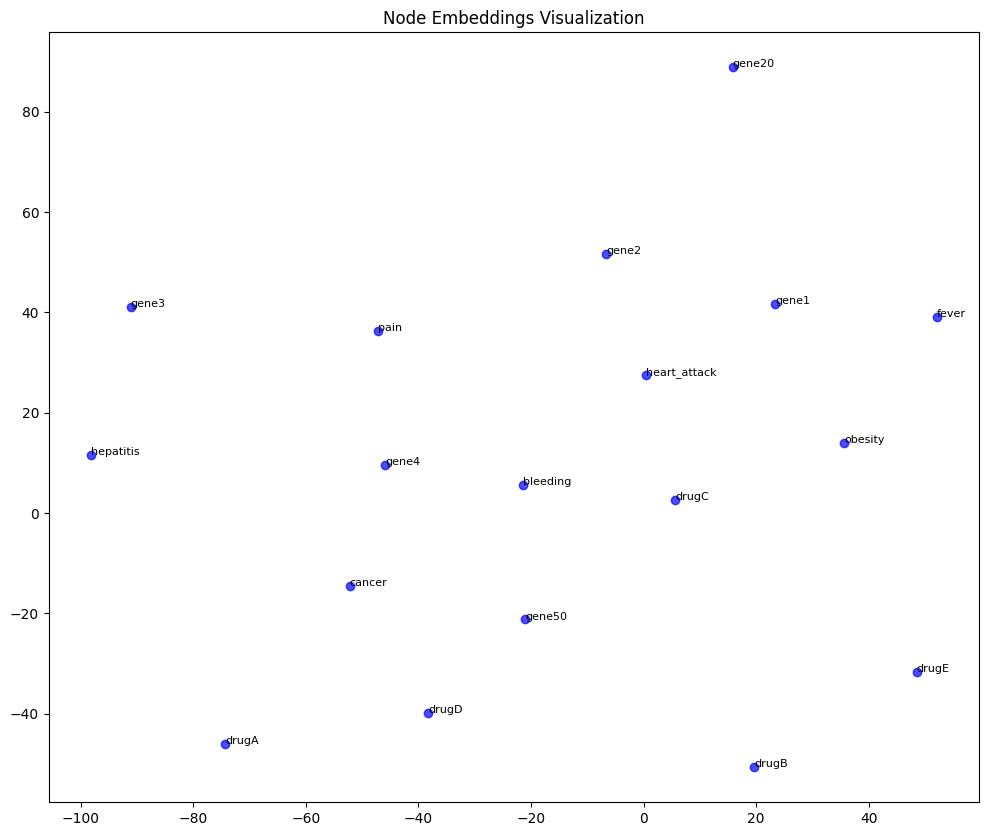

In [ ]:
from node2vec import Node2Vec

# genera incrustaciones de nodos usando node2vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4) # You can adjust these parameters
model = node2vec.fit(window=10, min_count=1, batch_words=4) # Training the model

# visualiza incrustaciones de nodos usando t-SNE
from sklearn.manifold import TSNE
import numpy as np

# obtiene las incrustaciones de todos los nodos
embeddings = np.array([model.wv[node] for node in G.nodes()])

# reduce la dimensionalidad usando t-SNE
tsne = TSNE(n_components=2, perplexity=10, n_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)

# visualiza  las incrustaciones de todos los nodos en 2D
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

# agrega etiquetas a los nodos
for i, node in enumerate(G.nodes()):
  plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('Node Embeddings Visualization')
plt.show()

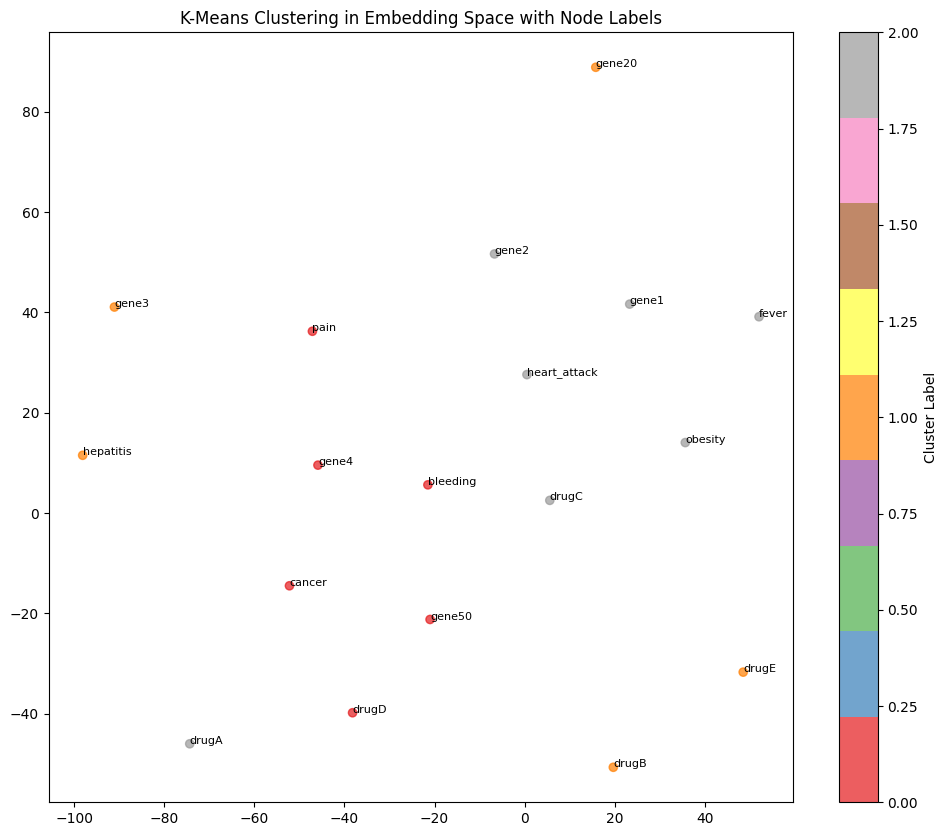

In [ ]:
from sklearn.cluster import KMeans

# ejecuta el agrupamiento de K-Means en las incrustaciones de nodos
num_clusters = 3 # ajusta el número de grupos
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# visualiza el agrupamiento de K-Means en las incrustaciones de nodos
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=plt.cm.Set1, alpha=0.7)

# agrga etiquetas a los nodos
for i, node in enumerate(G.nodes()):
  plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('K-Means Clustering in Embedding Space with Node Labels')

plt.colorbar(label="Cluster Label")
plt.show()

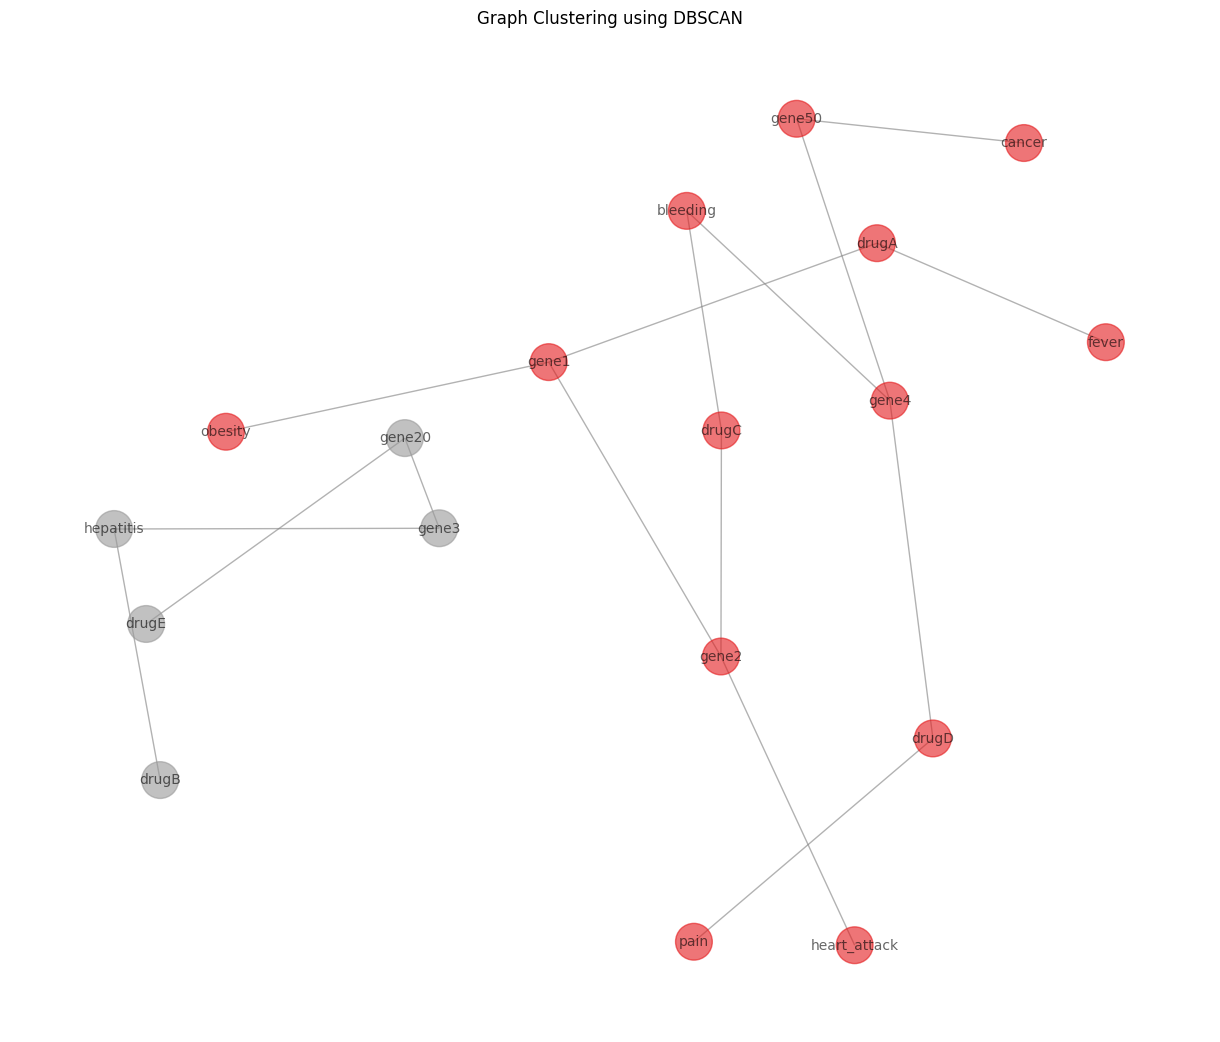

In [ ]:
from sklearn.cluster import DBSCAN

# ejecuta DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=2) # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(embeddings)

# visualiza el agrupamiento
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using DBSCAN')
plt.show()